In [121]:
from importlib import reload
import src.UNET
import src.preprocessing
reload(src.UNET)
reload(src.preprocessing)

import numpy as np
from src.UNET import UNET
from src.preprocessing import data_generator
from keras.models import load_model, Model

import matplotlib.pyplot as plt


In [122]:
PATCH_SIZE = 128

x_train, x_test, y_train, y_test = data_generator(PATCH_SIZE, num_images = 15, rotation_degs=[])

#datagen = ImageDataGenerator(
 #   featurewise_std_normalization = True 
#)

#datagen.fit(x_train)

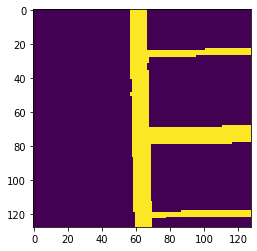

In [52]:
def preprocess_mask(mask):
    """Preprocessing function for masks."""
        #mask = mask/255
    mask[mask > 0.5] = 1
    mask[mask <= 0.5] = 0
    return mask

y0 = preprocess_mask(y_train[0])
plt.imshow(y0.reshape(PATCH_SIZE, PATCH_SIZE))

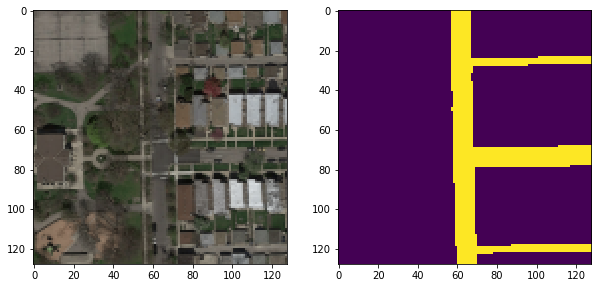

In [53]:
fig = plt.figure(figsize = (10, 10))
plt.subplot(1,2,1)
plt.imshow(x_train[0])
plt.subplot(1,2,2)
plt.imshow(y_train[0].reshape(PATCH_SIZE, PATCH_SIZE))


In [12]:
from skimage.transform import resize
NEW_RES = 64

def lower_res(x, channels):
    return [resize(x[i], (64, 64, channels) ) for i in range(len(x))]

x_tr = lower_res(x_train, 3)
x_te = lower_res(x_test, 3)
y_tr = lower_res(y_train, 1)
y_te = lower_res(y_test, 1)

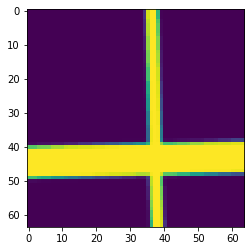

In [13]:
plt.imshow(y_tr[0].reshape(NEW_RES, NEW_RES))

In [14]:
from keras.utils import to_categorical

def fix_labels(y):
    y[y >= 0.5] = 1
    y[y < 0.5] = 0

    return to_categorical(y.astype(int))

y_train = fix_labels(y_train)
y_test = fix_labels(y_test)

array([0., 1.], dtype=float32)

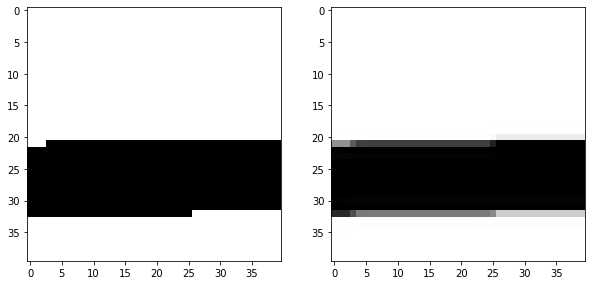

In [12]:
n = 3
plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
plt.imshow(y_tr[n].reshape(PATCH_SIZE, PATCH_SIZE), cmap = 'Greys')
plt.subplot(1,2,2)
plt.imshow(y_train[n].reshape(PATCH_SIZE, PATCH_SIZE), cmap = 'Greys')
np.unique(y_tr)

In [16]:
y_t = to_categorical(y_tr)

In [123]:
unet = UNET(args = '', image_shape = (PATCH_SIZE, PATCH_SIZE, 3), layers = 2)
unet.build_model()
model = unet.get_model()

Building model with 2 layers
Filtersizes being used in UNET: [16, 32, 64]
Bulding contraction layers at layer: 1 and filtersize: 16
Bulding contraction layers at layer: 2 and filtersize: 32
Building bottleneck at layer: 2 and filtersize: 64
Building expansion at layer: 2 and filtersize: 32
Building expansion at layer: 1 and filtersize: 16
Compiling model...
Model compiled.


In [289]:
model.load_weights('./models/keras-job-dir_weights_epoch95_11_13.29.h5')

In [290]:
model.evaluate(x_train, y_train)

12/12 [==============================] - 3s 267ms/step


[0.20381568372249603,
 0.8131987452507019,
 0.7708683609962463,
 0.8604481220245361,
 0.681060791015625]

In [299]:
n = 9
pred = model.predict(x_train[n:n+1, :, :, :])
pred[pred > 0.5] = 1
pred[pred <= 0.5] = 0
#pred = np.argmax(pred, axis = 3)
#pred = np.argmax(pred, axis = 3)
np.unique(pred)

array([0., 1.], dtype=float32)

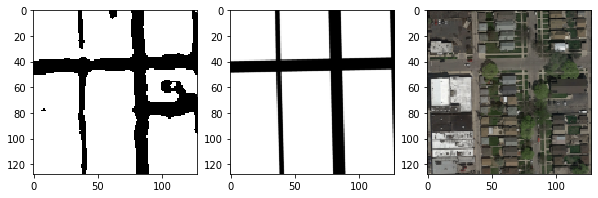

In [300]:
f = plt.figure(figsize = (10, 15))
plt.subplot(1,3,1)
plt.imshow(pred.reshape(PATCH_SIZE, PATCH_SIZE), cmap = 'Greys')
plt.subplot(1,3,2)
plt.imshow(y_train[n].reshape(PATCH_SIZE, PATCH_SIZE), cmap = 'Greys')
plt.subplot(1,3,3)
plt.imshow(x_train[n].reshape(PATCH_SIZE, PATCH_SIZE, 3))

In [252]:
from src.mask_to_submission import mask_to_submission_strings

mask_to_submission_strings(pred)

<generator object mask_to_submission_strings at 0x1c6838cdd0>

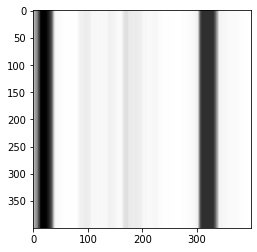

In [284]:
from skimage.transform import resize

plt.imshow(resize(pred, (400, 400, 1)).reshape(400,400), cmap = 'Greys')